In [5]:
import pandas as pd

file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)

print("\nLast 10 rows of the dataset:")
print(df.tail(10))

print("\nDataset Info:")
print(df.info())

print("\nFull Summary of Dataset:")
print(df.describe(include='all').to_string())


Last 10 rows of the dataset:
     COUNTRY COURSE TYPE COURSE (SPECIALIZATION)       FEES
479  BELGIUM       M.ENG        M.ENG in Biology     311673
480  BELGIUM       M.ENG     M.ENG in Biomedical     542040
481  BELGIUM       M.ENG      M.ENG in Materials     542040
482  BELGIUM       M.ENG        M.ENG in Nuclear    80402.6
483  BELGIUM        M.Sc         M.Sc in Physics   81848.04
484  BELGIUM        M.Sc       M.Sc in Chemistry  172188.04
485  BELGIUM        M.Sc         M.Sc in Biology     130993
486  BELGIUM        M.Sc     M.Sc in Psychology      130993
487  BELGIUM        M.Sc     M.Sc in Environment      90340
488  BELGIUM        M.Sc   M.Sc in Data Analysis   102084.2

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COUNTRY                  489 non-null    object
 1   COURSE TYPE              48

In [6]:
import pandas as pd
df = pd.read_csv( 'dsprojj2.csv')
print("Original Data (Continuous 'FEES'):")
print(df[['FEES']].head(10))

df['FEES'] = pd.to_numeric(df['FEES'], errors='coerce')

df['FEES_category'] = pd.qcut(df['FEES'], q=3, labels=['Low', 'Medium', 'High'])

df.to_csv('dsprojj2.csv', index=False)
print("Data after discretization (saved to original file):")
print(df[['FEES', 'FEES_category']].head(10))

Original Data (Continuous 'FEES'):
         FEES
0  3678127.31
1  1253594.37
2   454540.69
3  3246719.22
4  1217519.71
5  1442986.32
6  1112181.71
7  1420439.66
8  1339271.68
9  1147174.12
Data after discretization (saved to original file):
         FEES FEES_category
0  3678127.31          High
1  1253594.37        Medium
2   454540.69           Low
3  3246719.22          High
4  1217519.71        Medium
5  1442986.32        Medium
6  1112181.71        Medium
7  1420439.66        Medium
8  1339271.68        Medium
9  1147174.12        Medium


In [7]:
import pandas as pd
file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)

df = df.dropna(subset=['FEES', 'FEES_category'])

for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)
df = df.drop_duplicates()

Q1 = df['FEES'].quantile(0.25)
Q3 = df['FEES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FEES'] >= lower_bound) & (df['FEES'] <= upper_bound)]

df.to_csv(file_path, index=False)

print("\nCleaned Dataset Info:")
print(df.info())
print("\nSample of Cleaned Data:")
print(df.head(10))


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 0 to 488
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTRY                  468 non-null    object 
 1   COURSE TYPE              468 non-null    object 
 2   COURSE (SPECIALIZATION)  468 non-null    object 
 3   FEES                     468 non-null    float64
 4   FEES_category            468 non-null    object 
dtypes: float64(1), object(4)
memory usage: 21.9+ KB
None

Sample of Cleaned Data:
   COUNTRY COURSE TYPE                          COURSE (SPECIALIZATION)  \
0  GERMANY         MBA                        MBA in Sales & Marketing    
1  GERMANY         MBA                                   MBA in Banking   
2  GERMANY         MBA                   MBA in Business Administration   
3  GERMANY         MBA            MBA in Hospital/Healthcare Management   
4  GERMANY         MBA                 MBA

In [8]:
import pandas as pd

file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)

# Apply Exponential Smoothing to the 'FEES' column
alpha = 0.3
df['FEES_Smoothed_ES'] = df['FEES'].ewm(alpha=alpha, adjust=False).mean()

df.to_csv(file_path, index=False)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\nData After Exponential Smoothing:")
print(df[['FEES', 'FEES_Smoothed_ES']].head(10))


Data After Exponential Smoothing:
        FEES  FEES_Smoothed_ES
0 3678127.31        3678127.31
1 1253594.37        2950767.43
2  454540.69        2201899.41
3 3246719.22        2515345.35
4 1217519.71        2125997.66
5 1442986.32        1921094.26
6 1112181.71        1678420.49
7 1420439.66        1601026.24
8 1339271.68        1522499.87
9 1147174.12        1409902.15


In [9]:
import pandas as pd
file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)
print("\nDataset Info Before Aggregation:")
print(df.info())
aggregation = df.groupby('FEES_category').agg(
    Mean_FEES=('FEES', 'mean'),
    Count=('FEES', 'size')
).reset_index()
print("\nAggregated Data:")
print(aggregation)
aggregation.to_csv('aggregated_data.csv', index=False)



Dataset Info Before Aggregation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTRY                  468 non-null    object 
 1   COURSE TYPE              468 non-null    object 
 2   COURSE (SPECIALIZATION)  468 non-null    object 
 3   FEES                     468 non-null    float64
 4   FEES_category            468 non-null    object 
 5   FEES_Smoothed_ES         468 non-null    float64
dtypes: float64(2), object(4)
memory usage: 22.1+ KB
None

Aggregated Data:
  FEES_category  Mean_FEES  Count
0          High 2775795.90    142
1           Low  532146.71    163
2        Medium 1418916.72    163


In [10]:
import pandas as pd
file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)
# Generalization (optional): Group by desired attributes and calculate mean and count
generalization = df.groupby(['COUNTRY', 'COURSE TYPE', 'FEES_category']).agg(
    Mean_FEES=('FEES', 'mean'),
    Count=('FEES', 'size')
).reset_index()

print("\nGeneralized Data:")
print(generalization)
# Save generalized data to a new CSV file ,to preserve original data
generalization.to_csv('generalizeddata.csv', index=False)


Generalized Data:
      COUNTRY            COURSE TYPE FEES_category  Mean_FEES  Count
0   AUSTRALIA                  M.ENG          High 2113617.10     13
1   AUSTRALIA                  M.ENG        Medium 1627902.18      1
2   AUSTRALIA                   M.Sc          High 2174797.19      6
3   AUSTRALIA                   M.Sc        Medium 1665267.46      2
4   AUSTRALIA  MASTERS OF MANAGEMENT          High 2326401.77      7
..        ...                    ...           ...        ...    ...
91        USA  MASTERS OF MANAGEMENT          High 3322582.51      9
92        USA  MASTERS OF MANAGEMENT           Low  538339.91      2
93        USA  MASTERS OF MANAGEMENT        Medium 1514341.01      1
94        USA                    MBA          High 2411177.98      7
95        USA                    MBA        Medium 1417822.57      1

[96 rows x 5 columns]


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)
# Initialize the Standard Scaler
scaler = StandardScaler()
# Apply Z-score normalization to the 'FEES' column
df['FEES'] = scaler.fit_transform(df[['FEES']])
df['FEES_Smoothed_ES'] = scaler.fit_transform(df[['FEES_Smoothed_ES']])
# Print sample of normalized data
print("\nData with Z-score Normalized 'FEES' Column:")
print(df[['FEES']].head())
print("\nData with Z-score Normalized 'FEES_Smoothed_ES' Column:")
print(df[['FEES_Smoothed_ES']].head())
df.to_csv(file_path, index=False)


Data with Z-score Normalized 'FEES' Column:
   FEES
0  2.15
1 -0.27
2 -1.06
3  1.72
4 -0.30

Data with Z-score Normalized 'FEES_Smoothed_ES' Column:
   FEES_Smoothed_ES
0              2.98
1              1.97
2              0.92
3              1.36
4              0.82


In [12]:
df.head(10)

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES,FEES_category,FEES_Smoothed_ES
0,GERMANY,MBA,MBA in Sales & Marketing,2.15,High,2.98
1,GERMANY,MBA,MBA in Banking,-0.27,Medium,1.97
2,GERMANY,MBA,MBA in Business Administration,-1.06,Low,0.92
3,GERMANY,MBA,MBA in Hospital/Healthcare Management,1.72,High,1.36
4,GERMANY,MBA,MBA in Human Resource Management,-0.30,Medium,0.82
5,GERMANY,MBA,MBA in Internal Business,-0.08,Medium,0.53
6,GERMANY,MBA,MBA in Supply Chain & Logistics Management,-0.41,Medium,0.19
7,GERMANY,MBA,MBA in General Management,-0.10,Medium,0.09
8,GERMANY,MBA,MBA in Global Business Management,-0.18,Medium,-0.02
9,GERMANY,MBA,MBA in Entrepreneurship & Leadership Management,-0.37,Medium,-0.18


Matplotlib is building the font cache; this may take a moment.



Correlation Matrix:
                  FEES  FEES_Smoothed_ES
FEES              1.00              0.81
FEES_Smoothed_ES  0.81              1.00


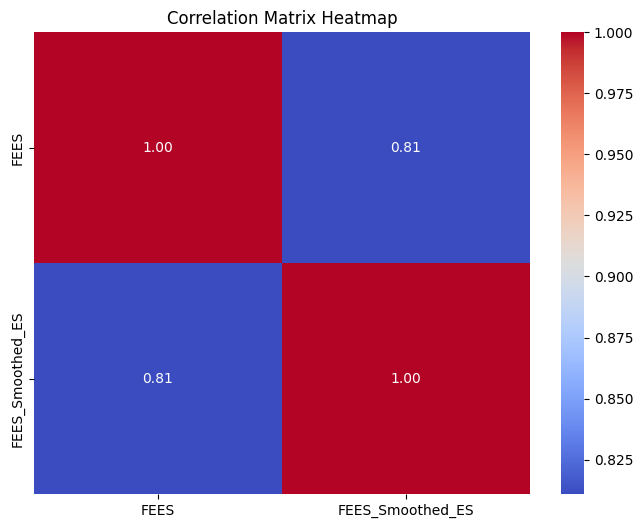

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)

# Select numerical columns for correlation analysis
numerical_columns = ['FEES', 'FEES_Smoothed_ES']
correlation_matrix = df[numerical_columns].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot heatmap for visualizing correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:
import pandas as pd

# Load dataset
file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)

# Drop the original 'FEES' column as per high correlation analysis
df = df.drop(columns=['FEES'], errors='ignore')

# Perform one-hot encoding for 'COURSE TYPE' to create four columns
df = pd.get_dummies(df, columns=['COURSE TYPE'], drop_first=False)

# Ensure all encoded columns are in 1/0 format (only for one-hot encoded columns)
# Get the columns that start with 'COURSE TYPE_' to target only the encoded columns
one_hot_columns = [col for col in df.columns if col.startswith('COURSE TYPE_')]
df[one_hot_columns] = df[one_hot_columns].astype(int)

# Save the modified dataset to ensure changes are retained
df.to_csv(file_path, index=False)

# Display sample data after modifications
print("\nSample of Data after Dropping 'FEES' and One-Hot Encoding 'COURSE TYPE':")
print(df.head())



Sample of Data after Dropping 'FEES' and One-Hot Encoding 'COURSE TYPE':
   COUNTRY                COURSE (SPECIALIZATION) FEES_category  \
0  GERMANY              MBA in Sales & Marketing           High   
1  GERMANY                         MBA in Banking        Medium   
2  GERMANY         MBA in Business Administration           Low   
3  GERMANY  MBA in Hospital/Healthcare Management          High   
4  GERMANY       MBA in Human Resource Management        Medium   

   FEES_Smoothed_ES  COURSE TYPE_M.ENG  COURSE TYPE_M.Sc  \
0              2.98                  0                 0   
1              1.97                  0                 0   
2              0.92                  0                 0   
3              1.36                  0                 0   
4              0.82                  0                 0   

   COURSE TYPE_MASTERS OF MANAGEMENT  COURSE TYPE_MBA  
0                                  0                1  
1                                  0              

In [15]:
df.head(10)

,COUNTRY,COURSE (SPECIALIZATION),FEES_category,FEES_Smoothed_ES,COURSE TYPE_M.ENG,COURSE TYPE_M.Sc,COURSE TYPE_MASTERS OF MANAGEMENT,COURSE TYPE_MBA
0,GERMANY,MBA in Sales & Marketing,High,2.98,0,0,0,1
1,GERMANY,MBA in Banking,Medium,1.97,0,0,0,1
2,GERMANY,MBA in Business Administration,Low,0.92,0,0,0,1
3,GERMANY,MBA in Hospital/Healthcare Management,High,1.36,0,0,0,1
4,GERMANY,MBA in Human Resource Management,Medium,0.82,0,0,0,1
5,GERMANY,MBA in Internal Business,Medium,0.53,0,0,0,1
6,GERMANY,MBA in Supply Chain & Logistics Management,Medium,0.19,0,0,0,1
7,GERMANY,MBA in General Management,Medium,0.09,0,0,0,1
8,GERMANY,MBA in Global Business Management,Medium,-0.02,0,0,0,1
9,GERMANY,MBA in Entrepreneurship & Leadership Management,Medium,-0.18,0,0,0,1


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset
file_path = 'dsprojj2.csv'  # Adjust to your file path if necessary
df = pd.read_csv(file_path)

# Define features (X) and target (y)
X = df.drop(columns=['FEES_Smoothed_ES'])  # Exclude the target column
y = df['FEES_Smoothed_ES']


In [17]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
categorical_columns = ['COUNTRY', 'COURSE (SPECIALIZATION)', 'FEES_category']
# Using Label Encoding for simplicity, but OneHotEncoding could also be considered for better performance with categorical data.
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features (X) and target (y)
X = df.drop(columns=['FEES_Smoothed_ES'])  # Exclude the target column
y = df['FEES_Smoothed_ES']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate model performance
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Model Evaluation Metrics for Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R-squared (R2): {rf_r2}")

# Display predictions vs actual costs for study
predictions_df_rf = pd.DataFrame({'Actual FEES_Smoothed_ES': y_test, 'Predicted FEES_Smoothed_ES': rf_y_pred})
print("\nPredicted vs Actual FEES_Smoothed_ES for Random Forest:")
print(predictions_df_rf.head(10))  # Display the first 10 predictions for comparison


Model Evaluation Metrics for Random Forest Regressor:
Mean Absolute Error (MAE): 0.43117662038937365
Mean Squared Error (MSE): 0.37568268853363035
Root Mean Squared Error (RMSE): 0.6129295950870951
R-squared (R2): 0.638450892301796

Predicted vs Actual FEES_Smoothed_ES for Random Forest:
     Actual FEES_Smoothed_ES  Predicted FEES_Smoothed_ES
55                     -0.23                       -0.38
63                      0.51                        1.08
33                     -0.12                       -0.45
297                     0.69                       -0.00
72                      2.03                        2.27
228                    -1.48                       -0.98
209                    -0.93                       -0.79
9                      -0.18                       -0.16
428                    -1.43                       -1.24
231                    -0.86                       -0.47


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y)
X = df.drop(columns=['FEES_Smoothed_ES'])  # Exclude the target column
y = df['FEES_Smoothed_ES']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate model performance
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Model Evaluation Metrics for Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse}")
print(f"R-squared (R2): {gb_r2}")

# Display predictions vs actual costs for study
predictions_df_gb = pd.DataFrame({'Actual FEES_Smoothed_ES': y_test, 'Predicted FEES_Smoothed_ES': gb_y_pred})
print("\nPredicted vs Actual FEES_Smoothed_ES for Gradient Boosting:")
print(predictions_df_gb.head(10))  # Display the first 10 predictions for comparison


Model Evaluation Metrics for Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.376502040992113
Mean Squared Error (MSE): 0.2731222240169285
Root Mean Squared Error (RMSE): 0.5226109681368432
R-squared (R2): 0.7371529234650113

Predicted vs Actual FEES_Smoothed_ES for Gradient Boosting:
     Actual FEES_Smoothed_ES  Predicted FEES_Smoothed_ES
55                     -0.23                       -0.41
63                      0.51                        1.21
33                     -0.12                       -0.30
297                     0.69                        0.46
72                      2.03                        2.33
228                    -1.48                       -1.03
209                    -0.93                       -0.25
9                      -0.18                        0.06
428                    -1.43                       -1.25
231                    -0.86                       -0.80


In [19]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
file_path = 'dsprojj2.csv'
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=['FEES_Smoothed_ES'])
y = df['FEES_Smoothed_ES']

# Encode categorical columns (if not done already)
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['COUNTRY', 'COURSE (SPECIALIZATION)', 'FEES_category']
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced number of features: {X_pca.shape[1]}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics for Gradient Boosting Regressor (with PCA):")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Compare predictions vs actual values
predictions_df = pd.DataFrame({'Actual FEES_Smoothed_ES': y_test, 'Predicted FEES_Smoothed_ES': y_pred})
print("\nPredicted vs Actual FEES_Smoothed_ES (after PCA):")
print(predictions_df.head(10))


Reduced number of features: 5
Model Evaluation Metrics for Gradient Boosting Regressor (with PCA):
Mean Absolute Error (MAE): 0.42109500913441067
Mean Squared Error (MSE): 0.33642252436271447
Root Mean Squared Error (RMSE): 0.5800194172290394
R-squared (R2): 0.6762340474945032

Predicted vs Actual FEES_Smoothed_ES (after PCA):
     Actual FEES_Smoothed_ES  Predicted FEES_Smoothed_ES
55                     -0.23                       -0.30
63                      0.51                        0.97
33                     -0.12                       -0.42
297                     0.69                       -0.83
72                      2.03                        2.12
228                    -1.48                       -0.70
209                    -0.93                       -0.63
9                      -0.18                       -0.10
428                    -1.43                       -1.09
231                    -0.86                       -0.72


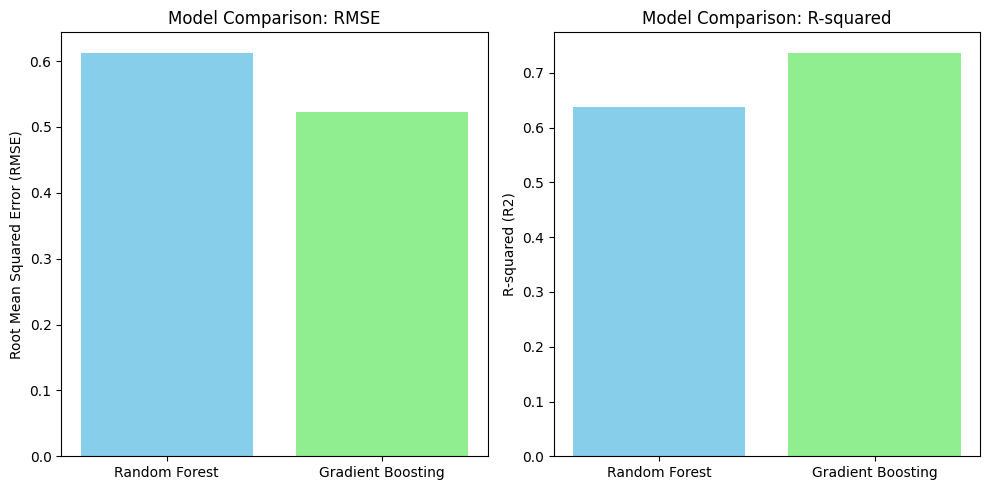

In [21]:
import matplotlib.pyplot as plt

# Model evaluation metrics
models = ['Random Forest', 'Gradient Boosting']
rmse_values = [rf_rmse, gb_rmse]
r2_values = [rf_r2, gb_r2]

# Create a bar chart for RMSE values
plt.figure(figsize=(10, 5))

# Bar plot for RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['skyblue', 'lightgreen'])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison: RMSE')

# Bar plot for R-squared values
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['skyblue', 'lightgreen'])
plt.ylabel('R-squared (R2)')
plt.title('Model Comparison: R-squared')

# Show the plots
plt.tight_layout()
plt.show()
